In [1]:
# from dotenv import load_dotenv
# from langchain_teddynote import logging

# logging.langsmith("allforone")

In [2]:
# import os
# from dotenv import load_dotenv

# load_dotenv()

# # 환경 변수로 자동 추적 (LangChain이 자동 감지)
# os.environ["LANGSMITH_API_KEY"] = os.getenv("LANGSMITH_API_KEY")
# os.environ["LANGSMITH_TRACING"] = "true"  # 또는 "false"
# os.environ["LANGSMITH_PROJECT"] = "allforone"  # 프로젝트명

In [3]:
import os, sys
from pathlib import Path

src_path = Path(os.getcwd()).resolve().parents[1]
sys.path.append(str(src_path))

print(sys.path[-1])
import os

print(os.getcwd())

/Users/seobi/PythonProjects/RAG_Commander/src
/Users/seobi/PythonProjects/RAG_Commander/src/agents/main


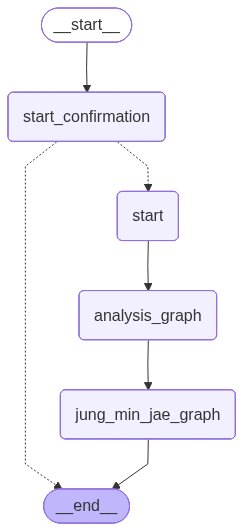

In [4]:
from agents.main.main_agent import graph_builder

graph = graph_builder.compile()
graph

In [5]:
from utils.format_message import format_message
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import InMemorySaver
from agents.state.main_state import MainState

messages_key = MainState.KEY.messages
checkpointer = InMemorySaver()
graph = graph_builder.compile(checkpointer=checkpointer)

thread = {"configurable": {"thread_id": "1"}}
result = await graph.ainvoke(
    {
        messages_key: [
            HumanMessage(
                content="서울 강남구 역삼동 근처를 분석하고 싶고, 84타입: 120세대 정도 생각합니다. "
            )
        ]
    },
    config=thread,
)

format_message(result[messages_key])

/Users/seobi/PythonProjects/RAG_Commander/src/tools/rag/vector_store.py:33: LangChainPendingDeprecationWarning: This class is pending deprecation and may be removed in a future version. You can swap to using the `PGVector` implementation in `langchain_postgres`. Please read the guidelines in the doc-string of this class to follow prior to migrating as there are some differences between the implementations. See <https://github.com/langchain-ai/langchain-postgres> for details about the new implementation.
  _pgvector_cache[collection_name] = PGVector(


강남구
10년이상 노후도 호출 질문 강남구
10년이상 노후도 호출 결과 {'result': [{'house_cnt': '4166', 'adm_cd': '11230', 'adm_nm': '강남구'}], 'errCd': 0, 'errMsg': 'Success', 'id': 'API_0306', 'trId': 'ZLlX_API_0306_1762142550668'}
연령층 분포 
행정구역: 강남구
2025년04월_계_총인구수: 556,822
2025년04월_계_연령구간인구수: 556,822
2025년04월_계_0~9세: 32,770
2025년04월_계_10~19세: 63,574
2025년04월_계_20~29세: 65,177
2025년04월_계_30~39세: 81,030
2025년04월_계_40~49세: 100,502
2025년04월_계_50~59세: 88,228
2025년04월_계_60~69세: 63,700
2025년04월_계_70~79세: 42,567
2025년04월_계_80~89세: 16,590
2025년04월_계_90~99세: 2,598
2025년04월_계_100세 이상: 86
2025년04월_남_총인구수: 266,037
2025년04월_남_연령구간인구수: 266,037
2025년04월_남_0~9세: 16,789
2025년04월_남_10~19세: 33,170
2025년04월_남_20~29세: 30,601
2025년04월_남_30~39세: 38,070
2025년04월_남_40~49세: 45,927
2025년04월_남_50~59세: 44,134
2025년04월_남_60~69세: 29,723
2025년04월_남_70~79세: 19,246
2025년04월_남_80~89세: 7,622
2025년04월_남_90~99세: 737
2025년04월_남_100세 이상: 18
2025년04월_여_총인구수: 290,785
2025년04월_여_연령구간인구수: 290,785
2025년04월_여_0~9세: 15,981
2025년04월_여_10~19세: 30,404
2025년04월_여_20

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ 서울 강남구 역삼동 근처를 분석하고 싶고, 84타입: 120세대 정도 생각합니다.                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ 제공해주신 정보(위치: 서울 강남구 역삼동, 84타입 약 120세대 기준)를 바탕으로 보고서 작성을 시작하겠습니다.      │
│ 요청하신 핵심 사항이 명확히 확인되었으므로, 전문적이고 체계적으로 분석 보고서를 준비하겠습니다.                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [6]:
result

{'messages': [HumanMessage(content='서울 강남구 역삼동 근처를 분석하고 싶고, 84타입: 120세대 정도 생각합니다. ', additional_kwargs={}, response_metadata={}, id='d9cc401c-bd3a-4155-b101-47bee20ed5fa'),
  AIMessage(content='제공해주신 정보(위치: 서울 강남구 역삼동, 84타입 약 120세대 기준)를 바탕으로 보고서 작성을 시작하겠습니다. 요청하신 핵심 사항이 명확히 확인되었으므로, 전문적이고 체계적으로 분석 보고서를 준비하겠습니다.', additional_kwargs={}, response_metadata={}, id='bc7fa415-c3e0-4302-95f7-a76a1d10cd46')],
 'start_input': {'target_area': '서울 강남구 역삼동',
  'main_type': '84타입: 120세대',
  'brand': None,
  'orientation': None,
  'parking_ratio': None,
  'terrain_condition': None,
  'gross_area': None,
  'floor_area_ratio_range': None,
  'building_coverage_ratio_range': None},
 'final_report': '# 표지 요약(Executive Summary)\n\n- BLUF: 본 사업지(서울 강남구 역삼동, 전용 84㎡ 120세대)의 권장 분양가 레인지는 3.3㎡당 1,370~1,430만원(총액 약 34.5~36.0억)으로 판단한다. 근거는 1km 내 유사 연식·평형 실거래 평단 1,370~1,420만원/3.3㎡(2023.07~2024.06)와 2km 내 최근 분양가 1,390~1,460만원/3.3㎡(2022.07~2023.09)의 교차 비교 결과이다.\n- 상단 적용(1,430만원/3.3㎡)은 ‘역세권(도보 7~10분 이내)+학세권(대치·역삼 학군 생활

In [9]:
print(result["analysis_outputs"]["housing_faq"]['result'])

# 서울 강남구 역삼동 84타입(120세대) 주택청약 정보 요약

---

## 1. 주택 청약 FAQ 정보

### 1.1. 청약자격 및 세대구성

- **무주택세대구성원**: 청약신청자 및 세대원 전원이 주택을 소유하지 않아야 함. (직계존비속, 배우자, 직계비속 등)
- **세대원 범위**: 본인, 배우자, 직계존속(배우자 포함), 직계비속(배우자 포함), 배우자의 직계비속(동일 주민등록표 등재 시)
- **60세 이상 직계존속 주택소유**: 동일세대 내 60세 이상 직계존속이 주택을 소유해도 무주택으로 인정(민영주택 일반공급 기준).
- **세대분리/합가**: 입주자모집공고일 기준 세대구성원 및 주택소유 여부로 판단. 청약 이후 세대원 변경 시 본 청약 모집공고일 기준 적용.
- **부적격 당첨자 제한**: 본인에게만 적용, 동일 세대원에게는 미적용.

### 1.2. 청약 신청 및 당첨 제한

- **1순위 요건(투기과열지구/청약과열지역)**: 
  - 주택청약종합저축 2년 이상, 예치금 충족, 세대주, 5년 이내 당첨 이력 없는 세대.
  - 2주택 이상 소유 세대는 1순위 불가.
- **재당첨 제한**: 
  - 투기과열지구: 10년, 청약과열지역: 7년(해당 주택유형 및 지역별로 상이).
  - 당첨자 및 동일세대원은 5년간 1순위 제한.
- **특별공급 횟수 제한**: 1세대 1회(생애최초, 신혼부부, 신생아 특별공급은 혼인 전 배우자 이력 미적용).
- **부부 동시 당첨**: 청약 접수일 빠른 사람, 동일 시 생년월일 빠른 사람 우선.

### 1.3. 기타 주요 사항

- **청약 가능지역**: 서울은 수도권 거주자도 청약 가능하나, 해당 지역 거주자가 우선 공급.
- **청약제한사항 확인**: 한국부동산원 청약홈에서 본인 및 세대원 제한사항 조회 가능(세대원 동의 필요).
- **특별공급 배점**: 무주택기간, 지역거주기간, 입주자저축 가입기간, 세대구성 등 배점 기준 적용.

---

## 2. 주택공급에 관한 규칙 요약

### 2.

In [11]:
print(result['final_report'])

# 표지 요약(Executive Summary)

- BLUF: 본 사업지(서울 강남구 역삼동, 전용 84㎡ 120세대)의 권장 분양가 레인지는 3.3㎡당 1,370~1,430만원(총액 약 34.5~36.0억)으로 판단한다. 근거는 1km 내 유사 연식·평형 실거래 평단 1,370~1,420만원/3.3㎡(2023.07~2024.06)와 2km 내 최근 분양가 1,390~1,460만원/3.3㎡(2022.07~2023.09)의 교차 비교 결과이다.
- 상단 적용(1,430만원/3.3㎡)은 ‘역세권(도보 7~10분 이내)+학세권(대치·역삼 학군 생활권 인접)+브랜드’ 3요건을 충족하고, 금융조건(계약금 10%, 중도금 일부 또는 무이자)을 동반할 때 타당하다. 반대로 3요건 미충족 시 하단(1,370만원/3.3㎡) 또는 그 이하 보수적 책정이 필요하다.
- 강남구는 최근 5년 미분양 ‘0’(2017.08~2025.08, 2019.05 예외 20호 1개월 내 해소)로 분양 실패 리스크가 구조적으로 낮다(국토교통부 통계누리(국가승인통계)). 다만 가격이 인근 매매 상단을 10% 이상 초과(≈1,500만원/3.3㎡ 이상) 시 단기 미계약 위험이 커진다.
- 핵심 리스크: (1) 사업지 좌표 기반 입지 데이터(역세권·학세권·생활편의 실보행 거리) 미확보, (2) 2025~2026년 인근 대규모 입주(예: 청담 르엘 1,261세대, 2025.11)로 체감공급 확대, (3) 2025년 9월 누적 강남구 인구 순유출 전환(-477명)로 수요 민감도 상승, (4) 분양가상한제 건축비 고시·심의 변동, (5) 금리/유동성 변동성 재확대 가능성.
- 정책·정비 사이클(신속통합기획 시즌2, 용적률 인센티브 확대 등, 2024~2025)은 중장기 가치에는 우호적이나, 단기에는 ‘공급 뉴스 플로우’로 가격 눈높이가 높아지는 양면성이 존재한다(출처: 국토교통부·서울시 보도자료·고시).

# 1.사업환경 분석

## 입지분석: 교육·교통·편의·자연·미래가치

Bottom Line: 좌표 기반